### 목표 : 당뇨병 예측 모델 구현
- 데이터 : scikit-learn dataset
- 피 처 : 10
- 타 겟 : 정수값

(1) 모듈 로딩 및 데이터 준비

In [131]:
from sklearn.datasets import load_diabetes
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [132]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [133]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [134]:
# 데이터 로딩
diabetes = load_diabetes()

In [135]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [136]:
featureArray = diabetes['data']
targetArray = diabetes['target']
feature_name = diabetes['feature_names']

In [137]:
featureArray.shape, targetArray.shape

((442, 10), (442,))

In [138]:
feature_name

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [139]:
## 데이터 로딩
featureDF, targetDF = load_diabetes(return_X_y = True, as_frame = True)

In [140]:
featureDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [141]:
targetDF

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [142]:
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size = 0.2)

In [143]:
# 모델 인스턴스 생성
model = LinearRegression()

In [144]:
model.fit(featureDF, targetDF)

LinearRegression()

In [145]:
# 학습 후 속성 확인
print(f'피처에 할당되는 가중치 계수 : {model.coef_}')
print(f'수식에 사용되는 절편 계수 : {model.intercept_}')

피처에 할당되는 가중치 계수 : [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
수식에 사용되는 절편 계수 : 152.13348416289597


In [146]:
y_pre = model.predict(featureDF)
y_pre = np.round(y_pre, 1)
y_pre

array([206.1,  68.1, 176.9, 166.9, 128.5, 106.4,  73.9, 118.9, 158.8,
       213.6,  97.1,  95.1, 115.1, 164.7, 103.1, 177.2, 211.8, 182.8,
       148. , 124. , 120.3,  85.8, 113.1, 252.5, 165.5, 147.7,  97.1,
       179.1, 129.1, 184.8, 158.7,  69.5, 261.5, 112.8,  78.4,  87.7,
       207.9, 157.9, 240.8, 136.9, 153.5,  74.2, 145.6,  77.8, 221.1,
       125.2, 142.6, 109.5,  73.1, 189.9, 157.9, 169.6, 134.2, 157.7,
       139.1,  72.7, 207.8,  80.1, 104.1, 134.6, 114.2, 180.7,  61.1,
        98.7, 113.8, 190. , 149. , 124.3, 114.8, 122. ,  73.9, 236.7,
       142.3, 124.5, 150.8, 127.8, 191.2,  77.1, 166.8,  91. , 174.8,
       122.8,  63.3, 152. ,  53.7, 166. ,  42.6, 153. ,  80.5, 106.9,
        79.9, 187.2, 192.6,  61.1, 107.4, 125. , 207.7, 214.2, 123.5,
       139.2, 168.2, 106.9, 150.6, 157.9, 152.8, 116.2,  73. , 155.7,
       230.1, 143.5,  38.1, 121.9, 152.8, 208. , 291.2, 189.2, 214. ,
       235.2, 165.4, 151.2, 156.6, 200.4, 219.4, 174.8, 169.2, 187.9,
        57.5, 108.5,

In [147]:
# 결정계수 값
print(f'결정계수 값 : {r2_score(targetDF, y_pre)}\n')

# 평균제곱오차
print(f'평균제곱오차 : {mean_squared_error(targetDF, y_pre)}\n')

# 평균절댓값오차
print(f'평균절댓값오차 : {mean_absolute_error(targetDF, y_pre)}\n')

# 루트평균제곱오차 : RMSE는 1.4버전에서 추가
print(f'루트평균제곱오차 : {mean_squared_error(targetDF, y_pre, squared = False)}\n')

결정계수 값 : 0.5177710835811172

평균제곱오차 : 2859.5619683257923

평균절댓값오차 : 43.275339366515844

루트평균제곱오차 : 53.47487230770909



In [148]:
np.corrcoef(featureDF['s6'].values, targetDF.values)

array([[1.        , 0.38248348],
       [0.38248348, 1.        ]])

In [149]:
scaler = StandardScaler()
scaler.fit(targetDF.values.reshape(-1, 1))
scaler.transform(targetDF.values.reshape(-1, 1))

array([[-1.47194752e-02],
       [-1.00165882e+00],
       [-1.44579915e-01],
       [ 6.99512942e-01],
       [-2.22496178e-01],
       [-7.15965848e-01],
       [-1.83538046e-01],
       [-1.15749134e+00],
       [-5.47147277e-01],
       [ 2.05006151e+00],
       [-6.64021672e-01],
       [-1.07957508e+00],
       [ 3.48889755e-01],
       [ 4.26806019e-01],
       [-4.43258925e-01],
       [ 2.45001404e-01],
       [ 1.80071184e-01],
       [-1.05621783e-01],
       [-7.15965848e-01],
       [ 2.06043272e-01],
       [-1.09256112e+00],
       [-1.33929596e+00],
       [-1.09256112e+00],
       [ 1.20596866e+00],
       [ 4.13819975e-01],
       [ 6.47568766e-01],
       [-1.96524090e-01],
       [-8.71798376e-01],
       [-2.74440354e-01],
       [ 1.69943833e+00],
       [-3.00412442e-01],
       [-1.20943552e+00],
       [ 2.45262887e+00],
       [-8.45826288e-01],
       [-1.13151925e+00],
       [-6.51035629e-01],
       [ 1.46568953e+00],
       [ 1.60853602e+00],
       [ 1.2

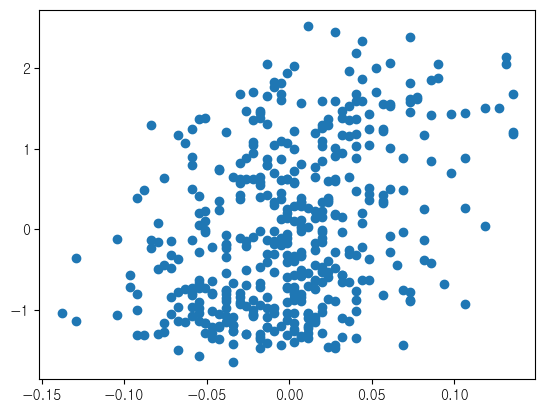

In [150]:
plt.scatter(featureDF['s6'], scaler.transform(targetDF.values.reshape(-1, 1)).flatten())
plt.show()

### 다른 당노병 데이터로 회귀 모델 구현 <hr>

In [151]:
diabetesDF = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
diabetesDF.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [152]:
diabetesDF.shape

(442, 11)

In [153]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [154]:
# 중복데이터 없음
diabetesDF.duplicated().sum()

0

In [155]:
# 결측치 없음
diabetesDF.isna().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [156]:
diabetesDF['S6'].describe()

count    442.000000
mean      91.260181
std       11.496335
min       58.000000
25%       83.250000
50%       91.000000
75%       98.000000
max      124.000000
Name: S6, dtype: float64

In [157]:
df = diabetesDF[diabetesDF.columns[3:]]
df.corr()['Y']

BP    0.441482
S1    0.212022
S2    0.174054
S3   -0.394789
S4    0.430453
S5    0.565883
S6    0.382483
Y     1.000000
Name: Y, dtype: float64

In [158]:
diabetesDF['AGE'].describe()

count    442.000000
mean      48.518100
std       13.109028
min       19.000000
25%       38.250000
50%       50.000000
75%       59.000000
max       79.000000
Name: AGE, dtype: float64

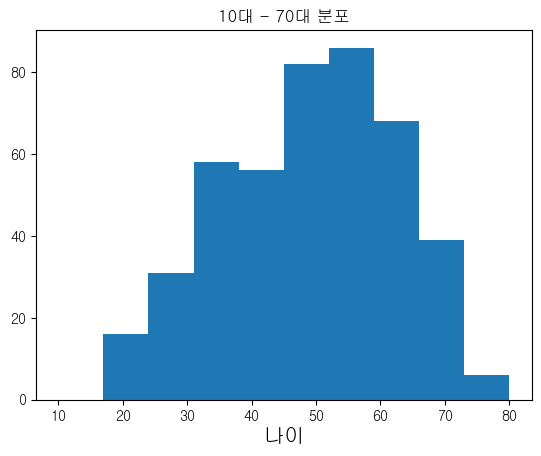

In [159]:
plt.hist(diabetesDF['AGE'], bins = 10, range = (10, 80))
plt.xlabel('나이', size = 15)
plt.title('10대 - 70대 분포')
plt.show()

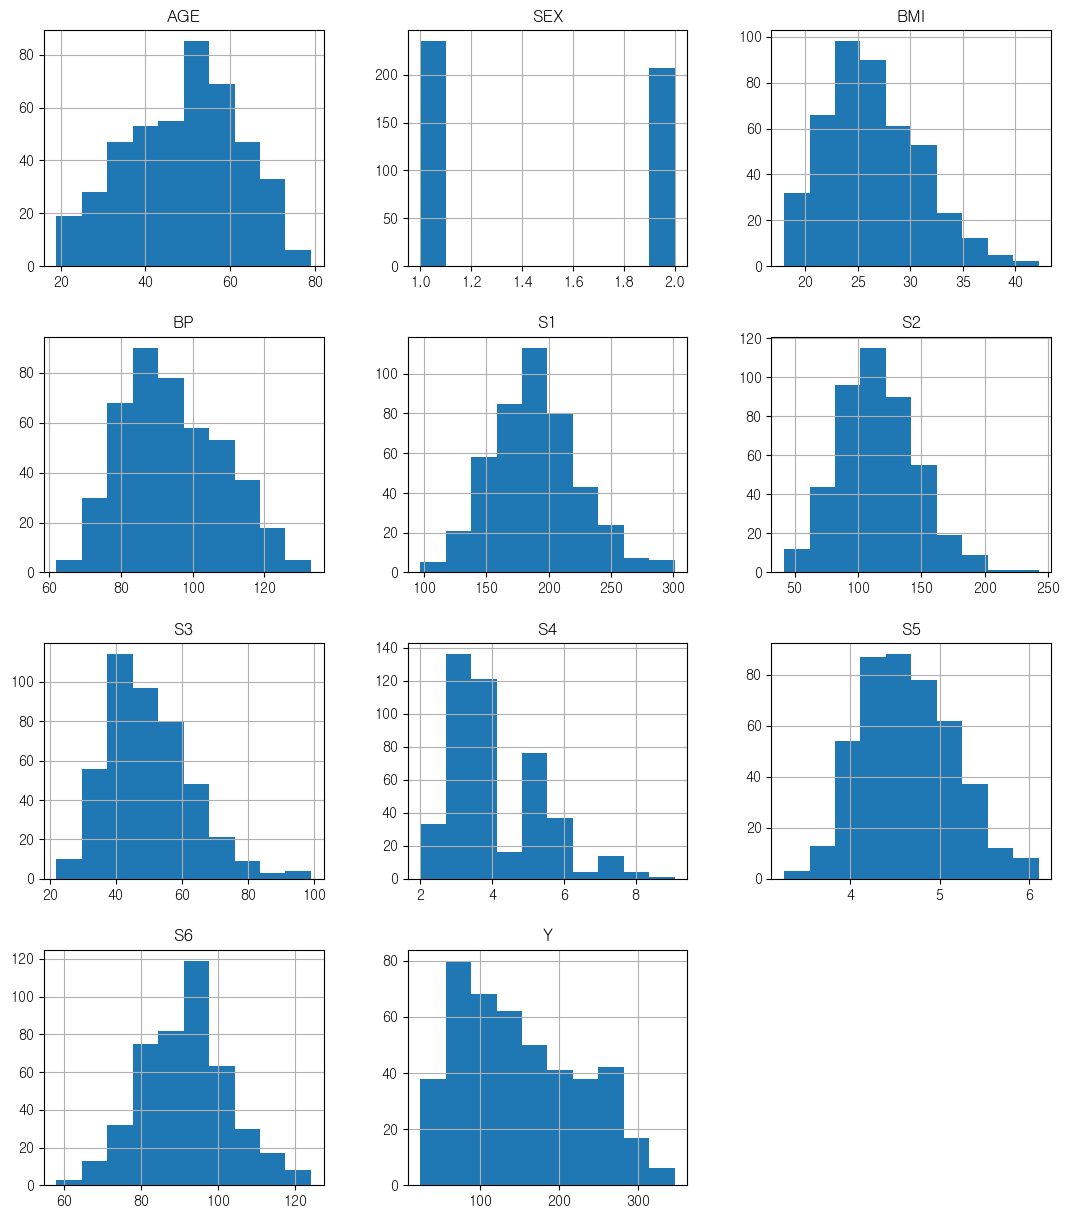

In [160]:
diabetesDF.hist(figsize = (13, 15))
plt.show()

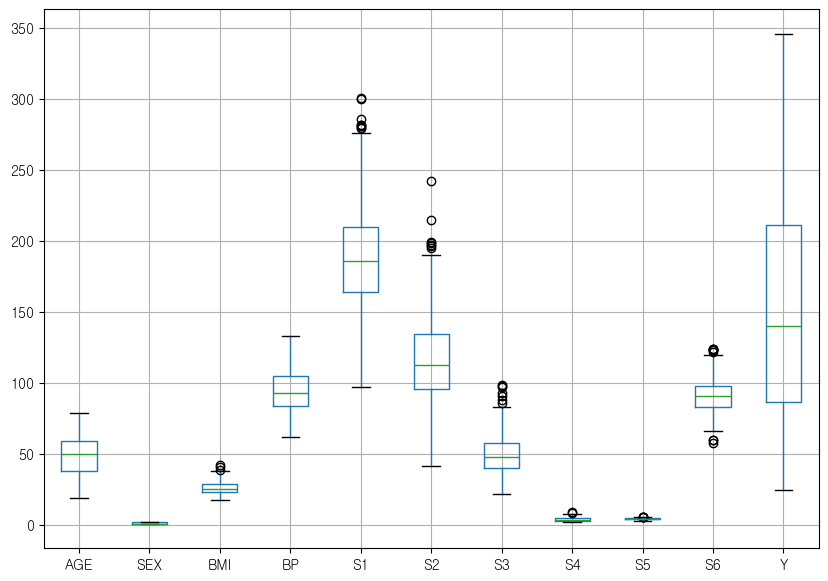

In [161]:
diabetesDF.boxplot(figsize = (10, 7))
plt.show()

In [162]:
# 사분위수 기반 이상치 탐지 함수
def find_outlier2(column_list, scale = 1.5, df = diabetesDF):
    for col in column_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        
        # 이상치로 판단할 기준이 되는 값
        lower = q1 - scale*iqr
        upper = q3 + scale*iqr
        mask = (df[col] < lower) | (df[col] > upper) 
        
        print(f'{col} 특성의 이상치 개수 : {df[col][mask].count()}개')

In [163]:
find_outlier2(diabetesDF.columns)

AGE 특성의 이상치 개수 : 0개
SEX 특성의 이상치 개수 : 0개
BMI 특성의 이상치 개수 : 3개
BP 특성의 이상치 개수 : 0개
S1 특성의 이상치 개수 : 8개
S2 특성의 이상치 개수 : 7개
S3 특성의 이상치 개수 : 7개
S4 특성의 이상치 개수 : 2개
S5 특성의 이상치 개수 : 4개
S6 특성의 이상치 개수 : 9개
Y 특성의 이상치 개수 : 0개


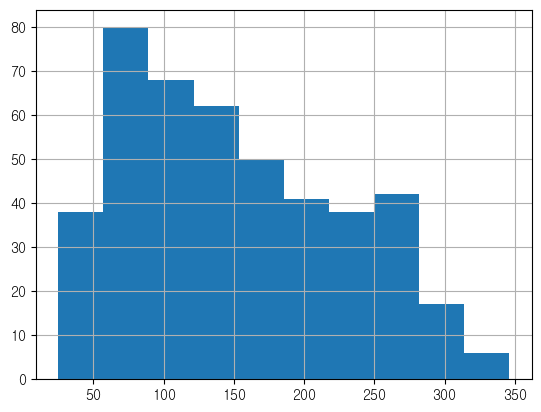

In [73]:
diabetesDF['Y'].hist()
plt.show()

In [192]:
diabetesDF = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")

In [193]:
# 사분위수 기반 이상치 제거 함수
def delete_outlier(column_list, scale = 1.5, df = diabetesDF):
    del_index_list = []
    for column in column_list:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - scale*iqr
        upper = q3 + scale*iqr
        mask = (df[column] > upper) | (df[column] < lower)
        index_list = list(df[mask].index)
        del_index_list += index_list
    
    del_index_list = list(set(del_index_list))
    df = df.drop(del_index_list)
    df.reset_index(drop = True, inplace = True)
    
    return df

In [194]:
diabetesDF.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [195]:
diabetesDF = delete_outlier(diabetesDF.columns[:-1])

In [196]:
diabetesDF.shape

(411, 11)

In [197]:
# 타겟 데이터와 피처 데이터의 산점도 함수
def scatter_plot(attribute, df = diabetesDF):
    plt.scatter(df[attribute], df['Y'], color = 'cornflowerblue', label = f"corr : {np.corrcoef(df[attribute], df['Y'])[0, 1]:.2}")
    plt.xlabel(f'{attribute}', size = 15)
    plt.ylabel('Y', size = 15)
    plt.legend()
    plt.show()

BP와 Y의 상관계수는 0.44


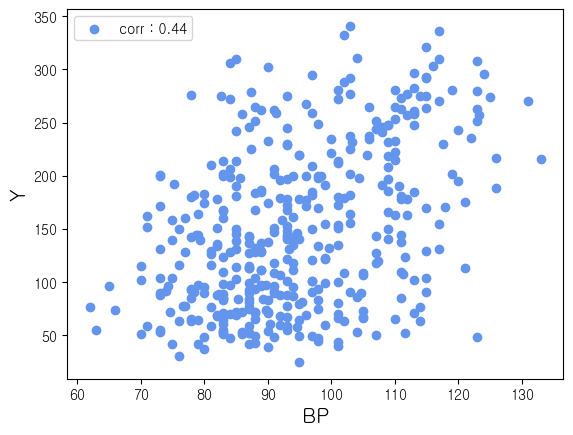

S1와 Y의 상관계수는 0.21


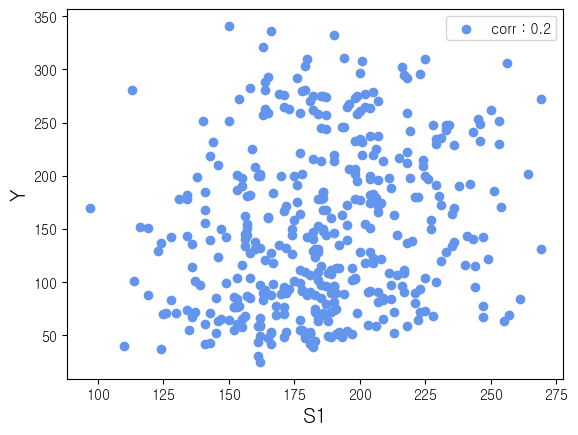

S2와 Y의 상관계수는 0.17


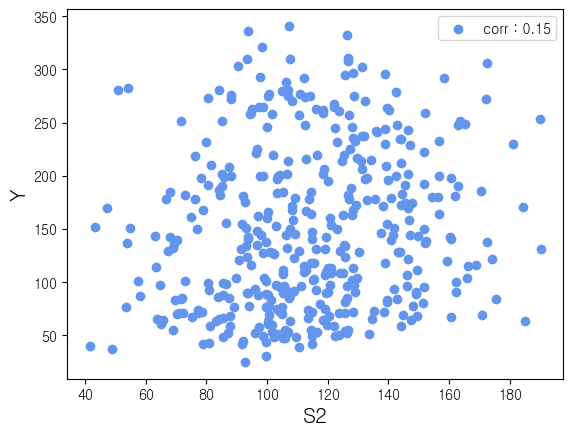

S3와 Y의 상관계수는 -0.39


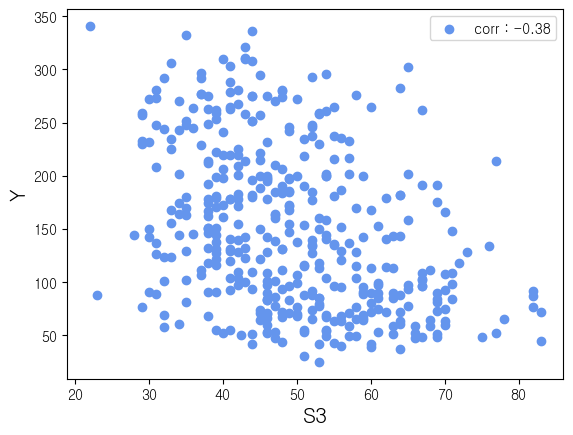

S4와 Y의 상관계수는 0.43


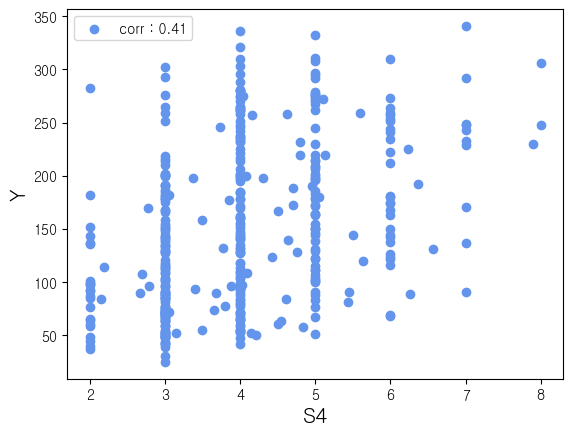

S5와 Y의 상관계수는 0.57


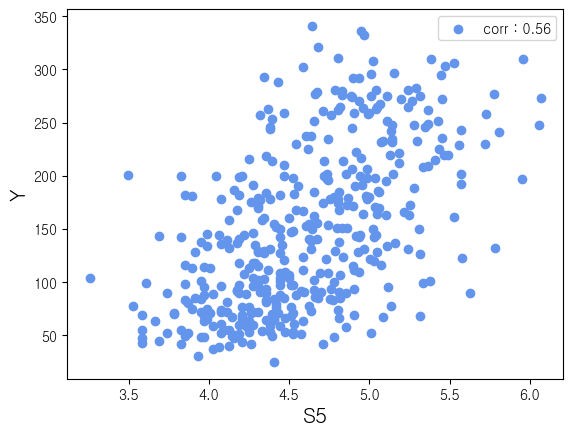

S6와 Y의 상관계수는 0.38


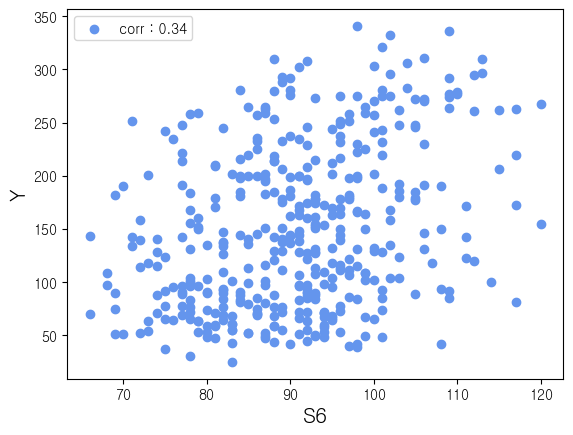

<Figure size 640x480 with 0 Axes>

In [210]:
for col in diabetesDF.columns[3 : -1]:
    print(f"{col}와 Y의 상관계수는 {round(df.corr()['Y'][col], 2)}")
    scatter_plot(col)
plt.tight_layout()

- 1개 피처로 확인

In [223]:
def findoptimal(attribute, my_model, my_scaler, test_size = 0.2, max_k = 50):
    
    diabetesDF = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
    
    # 이상치 제거
    diabetesDF = delete_outlier([attribute])
    
    featureDF = diabetesDF[[attribute]]
    targetDF = diabetesDF['Y'].to_frame()
    X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size = test_size, random_state = 42)
                                                    
    scaler = my_scaler
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    if my_model.__class__ == KNeighborsRegressor:
        train_scoreList = []
        test_scoreList = []
        for k in range(1, max_k + 1):
            model = KNeighborsRegressor(n_neighbors = k)
            model.fit(scaled_X_train, y_train)
            train_scoreList.append(model.score(scaled_X_train, y_train))
            test_scoreList.append(model.score(scaled_X_test, y_test))
        
        print(f'피처가 {attribute}일 때 최적의 이웃 개수 k = {test_scoreList.index(max(test_scoreList))+1}')
        model = KNeighborsRegressor(n_neighbors = test_scoreList.index(max(test_scoreList))+1)
        model.fit(scaled_X_train, y_train)
        return round(model.score(scaled_X_train, y_train), 2), round(model.score(scaled_X_test, y_test), 2)
    
    else:   
        my_model.fit(scaled_X_train, y_train)
        return round(my_model.score(scaled_X_train, y_train), 2), round(my_model.score(scaled_X_test, y_test), 2)

In [224]:
findoptimal('S4', LinearRegression(), StandardScaler())

(0.19, 0.2)

In [ ]:
train_scoreList = []
test_scoreList = []
def main(my_model, my_scaler, test_size = 0.2, max_k = 50):
    
    diabetesDF = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
    
    for col in diabetesDF.columns[:-1]:
        train_scoreList.append(findoptimal(col, my_model, my_scaler, test_size = test_size, max_k = max_k)[0])
        test_scoreList.append(findoptimal(col, my_model, my_scaler, test_size = test_size, max_k = max_k)[1])
    
    print(diabetesDF.columns[train_scoreList.index(max(train_scoreList))], round(max(train_scoreList), 2))
    print(diabetesDF.columns[test_scoreList.index(max(test_scoreList))], round(max(test_scoreList), 2))

In [ ]:
main(LinearRegression(), StandardScaler())

S5 0.35
BMI 0.32


- 2개 피처로 확인

In [225]:
def findoptimal(attri1, attri2, my_model, my_scaler, test_size = 0.2, max_k = 50):
    
    diabetesDF = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
    
    # 이상치 제거
    diabetesDF = delete_outlier([attri1, attri2])

    featureDF = diabetesDF[[attri1, attri2]]
    targetDF = diabetesDF['Y']
    X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size = test_size,
                                                    random_state = 42)
    scaler = my_scaler
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    if my_model.__class__ == KNeighborsRegressor:
        train_scoreList = []
        test_scoreList = []
        for k in range(1, max_k + 1):
            model = KNeighborsRegressor(n_neighbors = k)
            model.fit(scaled_X_train, y_train)
            train_scoreList.append(model.score(scaled_X_train, y_train))
            test_scoreList.append(model.score(scaled_X_test, y_test))
        
        # k에 따른 학습용/테스트용 점수 시각화
        # plt.plot(train_scoreList, 'b--', label = 'Train score')
        # plt.plot(test_scoreList, 'r', label = 'Test score')
        # plt.title('k & Score')
        # plt.xlabel('k')
        # plt.ylabel('Score')
        # plt.legend()
        # plt.show()

        print(f'피처가 {attri1}과 {attri2}일 때 최적의 이웃 개수 k = {test_scoreList.index(max(test_scoreList))+1}')
        model = KNeighborsRegressor(n_neighbors = test_scoreList.index(max(test_scoreList))+1)
        model.fit(scaled_X_train, y_train)
        return round(model.score(scaled_X_train, y_train), 2), round(model.score(scaled_X_test, y_test), 2)
        #print(f'train score는 k = {train_scoreList.index(max(train_scoreList))+1}일 때 최댓값 {max(train_scoreList)}을 갖는다.')
        #print(f'test score는 k = {test_scoreList.index(max(test_scoreList))+1}일 때 최댓값 {max(test_scoreList)}을 갖는다.')
    else:   
        my_model.fit(scaled_X_train, y_train)
        return round(my_model.score(scaled_X_train, y_train), 2), round(my_model.score(scaled_X_test, y_test), 2)

In [226]:
findoptimal('BMI', 'S4', LinearRegression(), StandardScaler())

(0.41, 0.29)

In [227]:
train_scoreList = []
test_scoreList = []
def main(my_model, my_scaler, test_size = 0.2, max_k = 50):
    
    diabetesDF = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
    
    pair_list = list(combinations(diabetesDF.columns[:-1], 2))
    for pair in pair_list:
        train_scoreList.append(findoptimal(pair[0], pair[1], my_model, my_scaler, test_size = test_size, max_k = max_k)[0])
        test_scoreList.append(findoptimal(pair[0], pair[1], my_model, my_scaler, test_size = test_size, max_k = max_k)[1])

    print(pair_list[train_scoreList.index(max(train_scoreList))], round(max(train_scoreList), 2))
    print(pair_list[test_scoreList.index(max(test_scoreList))], round(max(test_scoreList), 2))

In [228]:
main(LinearRegression(), StandardScaler())

('BMI', 'S5') 0.5
('S3', 'S5') 0.44


In [240]:
# 일부 특성 + 

diabetesDF = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
    
diabetesDF = delete_outlier(['BMI', 'S5'])
# cut = pd.cut(diabetesDF['AGE'].values, bins = [i for i in range(10, 81, 10)])

featureDF = diabetesDF[['AGE', 'SEX', 'BMI', 'S5']]
featureDF['product1'] = featureDF['BMI'] * featureDF['S5']
featureDF['AGE_range'] = diabetesDF['AGE'].apply(lambda x : math.trunc(x/10) * 10)


targetDF = diabetesDF['Y'].to_frame()
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                targetDF,
                                                test_size = 0.2, random_state = 42)
                                                
# scaler = StandardScaler()
# scaler.fit(X_train[X_train.columns[2:]])
# scaled_X_train = scaler.transform(X_train[X_train.columns[2:]])
# scaled_X_test = scaler.transform(X_test[X_test.columns[2:]])
ct = ColumnTransformer([('scaling', StandardScaler(), ['AGE', 'BMI', 'S5', 'product1']), ('onehot', OneHotEncoder(sparse = False), ['SEX' , 'AGE_range'])])
ct.fit(X_train)
scaled_X_train = ct.transform(X_train)
scaled_X_test = ct.transform(X_test)

model = LinearRegression()
model.fit(scaled_X_train, y_train)
model.score(scaled_X_test, y_test)

C:\Users\user\AppData\Local\Temp\ipykernel_29148\2837052852.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureDF['product1'] = featureDF['BMI'] * featureDF['S5']
C:\Users\user\AppData\Local\Temp\ipykernel_29148\2837052852.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureDF['AGE_range'] = diabetesDF['AGE'].apply(lambda x : math.trunc(x/10) * 10)
c:\Users\user\.conda\envs\EXAM_MML\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_outpu

0.208023836462517

In [253]:
# 전체 특성 + 
diabetesDF = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
    
# 이상치 제거
diabetesDF = delete_outlier(diabetesDF.columns[:-1])

featureDF = diabetesDF[diabetesDF.columns[:-1]]
featureDF['product1'] = featureDF['BMI'] * featureDF['S5']
featureDF['AGE_range'] = diabetesDF['AGE'].apply(lambda x : math.trunc(x/10) * 10)
targetDF = diabetesDF['Y'].to_frame()

X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                targetDF,
                                                test_size = 0.2, random_state = 42)
                                           
ct = ColumnTransformer([('scaling', StandardScaler(), list(diabetesDF.columns[2:-1]) + ['AGE']), ('onehot', OneHotEncoder(sparse = False), ['SEX', 'AGE_range'])])
ct.fit(X_train)
scaled_X_train = ct.transform(X_train)
scaled_X_test = ct.transform(X_test)

# model = LinearRegression()
# model.fit(scaled_X_train, y_train)
# model.score(scaled_X_test, y_test)

c:\Users\user\.conda\envs\EXAM_MML\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Found unknown categories [10] in column 1 during transform

In [261]:
featureDF.

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,product1,AGE_range
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,155.99958,50
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,84.06288,40
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,142.52040,70
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,123.72459,20
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,98.68150,50
...,...,...,...,...,...,...,...,...,...,...,...,...
406,33,1,19.5,80.00,171,85.4,75.0,2.00,3.9703,80,77.42085,30
407,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,140.53752,60
408,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,110.62323,40
409,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,102.76479,60


In [102]:
y_pre = model.predict(featureDF)
y_pre = np.round(y_pre, 1)
y_pre

c:\Users\user\.conda\envs\EXAM_MML\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 12 features, but LinearRegression is expecting 18 features as input.

In [103]:
targetDF

,Y
0,151
1,75
2,141
3,206
4,135
...,...
433,178
434,104
435,132
436,220


In [104]:
# 결정계수 값
print(r2_score(targetDF, y_pre))

# 평균제곱오차
print(mean_squared_error(targetDF, y_pre))

# 평균절댓값오차
print(mean_absolute_error(targetDF, y_pre))

# 루트평균제곱오차 : RMSE는 1.4버전에서 추가
print(mean_squared_error(targetDF, y_pre, squared = False))

ValueError: Found input variables with inconsistent numbers of samples: [438, 442]

In [ ]:
diabetesDF['AGE'] * diabetesDF['SEX']

0      118
1       48
2      144
3       24
4       50
      ... 
437    120
438     94
439    120
440     36
441     36
Length: 442, dtype: int64

In [ ]:
cut = pd.cut(diabetesDF['AGE'].values, bins = [i for i in range(10, 81, 10)])
cut.describe()

,counts,freqs
categories,,
"(10, 20]",6,0.013575
"(20, 30]",41,0.092760
"(30, 40]",75,0.169683
"(40, 50]",105,0.237557
"(50, 60]",129,0.291855
"(60, 70]",74,0.167421
"(70, 80]",12,0.027149


In [ ]:
import math
math.trunc(65/10) * 10

60

In [ ]:
diabetesDF['AGE'].apply(lambda x : math.trunc(x/10) * 10)

0      50
1      40
2      70
3      20
4      50
       ..
408    60
409    40
410    60
411    30
412    30
Name: AGE, Length: 413, dtype: int64

In [ ]:
cut.describe()['freqs'].values

array([0.01357466, 0.09276018, 0.16968326, 0.23755656, 0.2918552 ,
       0.16742081, 0.02714932])

In [ ]:
cut.describe()['counts'].values

array([  6,  41,  75, 105, 129,  74,  12], dtype=int64)